In [3]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [30]:
data = pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [31]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [32]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mode()[0])

In [33]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.422000,107.244000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.131205,6.064158,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
data = data.drop(columns=["Serial No."])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,312.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


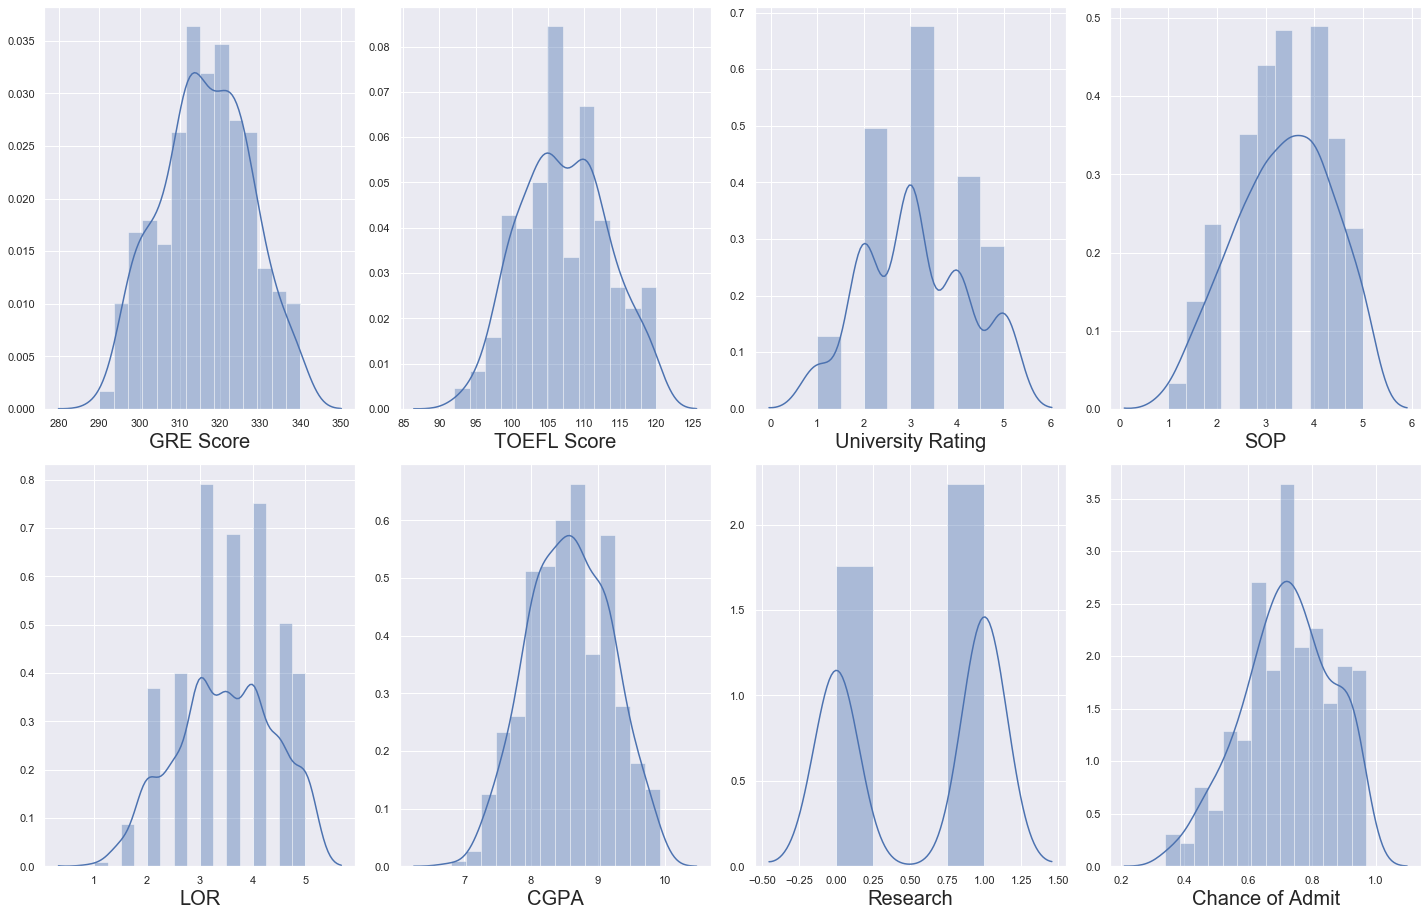

In [37]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    
    if plotnumber<=16:
        
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [40]:
Y = data['Chance of Admit']
x = data.drop(columns=['Chance of Admit'])

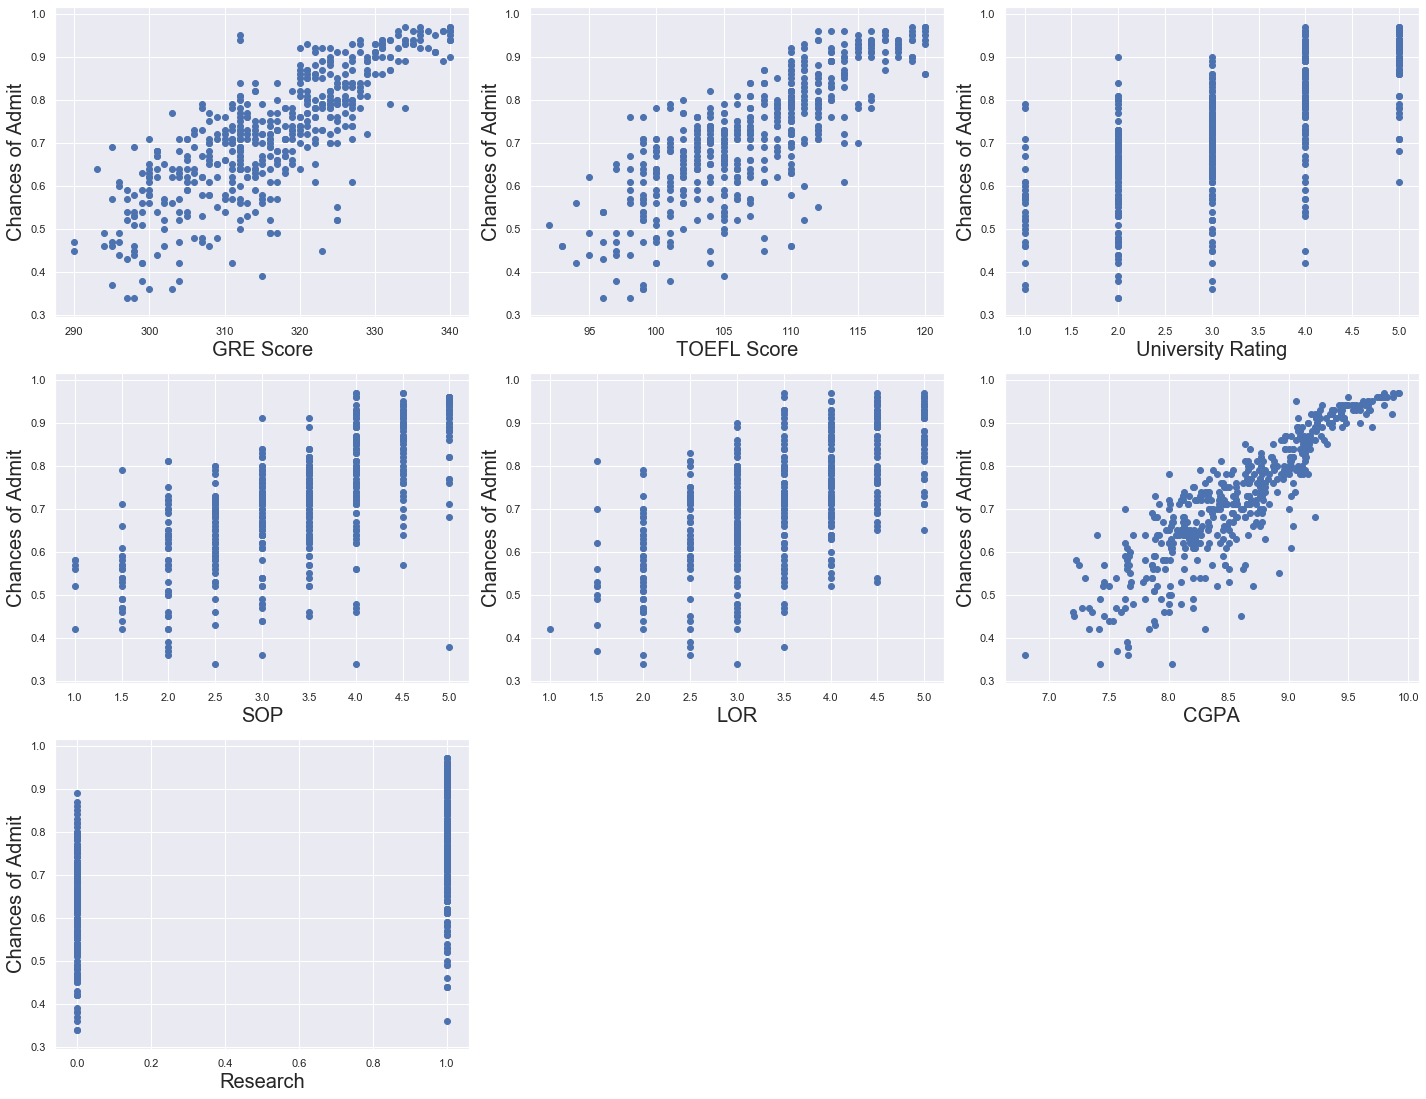

In [43]:
plt.figure(figsize=(20, 25), facecolor='white')
pltnumber = 1

for column in x:
    
    if pltnumber <= 15:
        
        ax = plt.subplot(5, 3, pltnumber)
        plt.scatter(x[column], Y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Chances of Admit', fontsize=20)
    pltnumber += 1
    
plt.tight_layout()

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=355)

In [77]:
regression = LinearRegression()

In [78]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# saving the model to the local file system
import  pickle
filename = 'finalized_linear_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [83]:
#predict outcome
loaded_model = pickle.load(open('finalized_linear_model.pickle', 'rb'))
a= loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.91985735])

In [84]:
regression.score(X_train, y_train)

0.8423357128754615

In [85]:
adj_r2(X_train,y_train)

0.8393284921401161